In [1]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist

plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_tweets = pd.read_csv('data/2019.csv') # read the csv file

In [3]:
df_tweets.shape # shows the number of rows and columns

(17698, 9)

In [4]:
df_tweets.info() # shows the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   full_text        17698 non-null  object
 1   user             17698 non-null  object
 2   location         17698 non-null  object
 3   date             17698 non-null  object
 4   tweet_id         17698 non-null  int64 
 5   number_rt        17698 non-null  int64 
 6   number_likes     17698 non-null  int64 
 7   number_reply     17698 non-null  int64 
 8   conversation_id  17698 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [5]:
df_tweets.describe() # shows the mean, std, min, max, etc. of each column

,tweet_id,number_rt,number_likes,number_reply,conversation_id
count,1.769800e+04,17698.000000,17698.000000,17698.000000,1.769800e+04
mean,1.147017e+18,2.145101,7.685614,0.606848,1.146736e+18
std,3.824295e+16,25.705813,97.046305,7.947419,3.908216e+16
min,1.083115e+18,0.000000,0.000000,0.000000,6.265645e+17
25%,1.111778e+18,0.000000,0.000000,0.000000,1.111776e+18
50%,1.145119e+18,0.000000,0.000000,0.000000,1.145118e+18
75%,1.178459e+18,0.000000,2.000000,0.000000,1.178457e+18
max,1.244776e+18,1650.000000,6946.000000,794.000000,1.244776e+18


In [6]:
df_tweets['full_text'].str.len().describe()

count    17698.000000
mean       142.696293
std         79.503198
min          7.000000
25%         77.000000
50%        126.000000
75%        208.000000
max        689.000000
Name: full_text, dtype: float64

In terms of tweet text length measured in characters, we found an average of 143 characters, a maximum of 689 characters and a minimum of 7 characters.

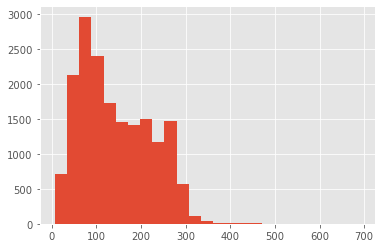

In [7]:
df_tweets['full_text'].str.len().mean() # shows the average length of the tweets
plt.hist(df_tweets['full_text'].str.len(),bins=25); # shows the histogram of the length of the tweets


According to the graph above, we can find that the distribution is skewed to the right. There are more sensitive or controversial topics that require a greater extension of characters. For this, we move on to analyze the words within the tweet.

In [8]:
df_tweets['full_text'].str.split().str.len().describe()

count    17698.000000
mean        21.930105
std         12.619929
min          1.000000
25%         12.000000
50%         19.000000
75%         31.000000
max         75.000000
Name: full_text, dtype: float64

In terms of tweet text length measured in words, we found an average of 22 words, a maximum of 75 words and a minimum of 1 word. 

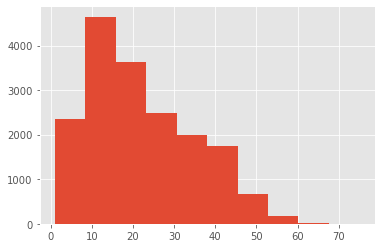

In [9]:
plt.hist(df_tweets['full_text'].str.split().str.len()); # shows the histogram of the length of the words in the tweets

We observe the same behavior when we look at the distribution in terms of words. We will proceed to review the tweets that contain the minimum and maximum number of words.

In [10]:
data=df_tweets.copy() # copy the dataframe
data['num_words']=df_tweets['full_text'].str.split().str.len() # create a new column with the number of words in each tweet
data['num_char']=df_tweets['full_text'].str.len() # create a new column with the number of characters in each tweet

In [11]:
data['num_words'].value_counts().reset_index().sort_values(by='index',ascending=False) # shows the number of words in each tweet

,index,num_words
64,75,1
63,69,1
65,67,1
62,65,1
59,62,3
...,...,...
24,5,323
31,4,277
42,3,163
46,2,123


In [12]:
data[['full_text','num_words']][data['num_words']==73]

,full_text,num_words


In [13]:
data[['full_text','num_words']][data['num_words']<=2].sort_values(by='num_words').sample(10) # shows the tweets with 75 words or 1 word

,full_text,num_words
13849,🍑🍑 Medellín,2
3451,@SaqueLargoWin Medellín,2
8825,PORFINNNNNNNNNNNN,1
2166,Hermosa Medellín!,2
5307,in Medellín,2
3332,@SaqueLargoWin Medellín,2
14715,#Medellín ayer.,2
6953,"Medellín, Colombia",2
13762,@JoseCuelloB Medellín,2
5439,in Medellín,2


We can observe how the tweets with fewer words (2 or less), the word "Medellin" is the most recurrent. This is because it is our main search topic. In the case of tweets with exactly two words, "Medellin" appears accompanied by a mention, an emoticon, a year, among others.

In [14]:
data.loc[8374,'full_text'] # shows the tweet with the index 8374

' @Alex881490101 @Ceballitos1 @ramirezdo @Angeljosew1 @RadicalEd @lilipiedadvalle @LAPacifiKA @LeilaChujfi @SerHRodriguez @ANNALVAREZG @MiremosaVer @juancadelgado @gener_usuga @MonoMeLlaman @edywfernandez @JAtecor @merv59 @JUANCAELBROKY @ClavijoAndres83 @Marianiniecheve @JohaFuentes @gurozu @MauricioGalin11 @LaMamert4 @DIDASKALOSW @InTweetiva @lbertoortiz @mauronuma @DanielSamperO @Julianaramirez6 @AlvaroUribeVel Esos uribeños que reciclan todo lo que dice su amo me hacen reír mucho. Es como hablar con un lorito. «Angelito quiere cacao» jajajajajaja Debería seguir lavando baños y no perder el tiempo defendiendo a un narcoterrorista excartel de Medellín. Un abrazo a todos!'

In [15]:
list=[65,67,69,75]
data2=data[['full_text','num_words']][(data['num_words']).isin(list)].sort_values(by='num_words') # shows the tweets with the words 65, 67, 69

In [16]:
print(data2.iloc[0,0],"\n"+"-"*20,data2.iloc[1,0],"\n"+"-"*20,data2.iloc[2,0],"\n"+"-"*20,data2.iloc[3,0])

 @baloncentralofi @MillosDColombia @MillonariosEste @acordellat @AficionColombia @CuyigansPasto @ConRola @Elyorkalvarez @nixoncarranza Así quedan los 8, el Once tiene buena diferencia de gol y el 9, 10 y 11 tienen partidos muy duros, difícil que sumen los 6, inclusive si esos 3 pierden entre semana ya quedan definidos los 8, a Medellín le tocaría ganar los dos partidos y esperar que el Once no sume en Sta Marta. 
--------------------  @transmetrobaq @UTSistur @pabvic1 @AMBQuilla @Metrocaribe @OperadorUno1 @luchovoltios @SOBUSA_SA @AtlanticoEmi @jorgecura1070 @CaracolBquilla @HENRYFOREROJ @ExtraNoticiasCo Ajá que culpa tengo yo sí así es la historia del metro Medellín. Aún así si fuera como me dices, digamos q sostiene, porque los metros q tienen más de 20 años y los metroplus q tienen casi la misma edad q los de bquilla, los de TM se ven acabados? Responda! Y estaciones 
--------------------  @HerliRodriguez2 @CarrillonavasG @indignada2016 @patriciam265 @paula30202449 @Setulus1 @Malupr

When looking at the texts with greater word length, we highlight two points: 
1. The large use of mentions using the at-word extends the length of the tweet and would not provide relevant information for sentiment analysis so deletion could be considered.
2. Something to keep in mind when including Medellin in the text of the tweet is that this may not only refer to the city, but also to the soccer team "Deportivo Independiente Medellin" so we must know how to differentiate this if we want to draw conclusions.
3. The tweets with fewer words associate their text with the word "Medellin" accompanied by something else, this alone would not be relevant for our analysis so it could be given a special treatment. 

## Preprocesamiento del texto

In [17]:
# import extra code that will help us in our process
import tools 
# import shape for our word cloud
char_mask = np.array(Image.open('circulo.png'))

In [18]:
# figure size in inches
sns.set(rc={'figure.figsize':(17,9)})

In [19]:
def twitter_to_words(df, column, stop_words,replace_punctuation_dict,replace_accent_dict):
  """
  clean de data to plot a word cloud with only the relevant information
  """
  wwpawsw = [] #Words_Without_Punctuation_And_Without_Stop_Words

  # creating a list with all the words inside all the tweets
  for tweet in df_tweets[column]:
    words = tweet.split()

    # remove punctuation marks
    for w in words:
      wl = w.lower() # word in lower case
      # replace some punctuations mark to keep only words
      for punctuation, new_value in replace_punctuation_dict.items():
        wl = wl.replace(punctuation,new_value)
      
      if wl.isalpha(): # skip if the word contains punctuation mark 

        # replace accent mark 
        for accent, new_value in replace_accent_dict.items():
          wl = wl.replace(accent,new_value)

        if wl not in stop_words: # filtering by stop words
          wwpawsw.append(wl)
  
  return wwpawsw

In [20]:
# function to plot th word cloud

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        max_words=50).generate_from_frequencies(word_fre)
  # plot the word cloud 
  plt.figure(figsize=(15,15))
  plt.imshow(wordcloud)

  #to remove axis value
  plt.axis('off')
  plt.show()

In [21]:
tweet_text=df_tweets['full_text']
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
  print(text,"\n")


 Por otro lado La Policía hizo allanamientos en Bogotá, Medellín y Cali a viviendas de personas que hacen parte de movimientos que promueven el #ParoNacional21Nov "En estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro." 

 CASA EN BELÉN LA GLORIA SOBRE LA AVENIDA 80 en Medellín/Antioquia/Colombia en Venta 

 @matyakdmia @CynDLQ Club Colombia perro. Y el Ron Medellín que tomó hasta @Nahuerc 

 @kenroVlogs Hermoso corazon saludos desde medellin colombia 

 Carechimba, EMPEZÓ A LLOVER JUSTO CUANDO TENGO QUE IR A CLASE, O SEA, NO, MEDELLÍN, ME TENÉS MAMADA MARICA 

 @Der0207 @IamCabezoon Junior le ofreció más q Medellín, lo dijeron en win, pero el burro este solo juega en su dim 

 El aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. La medida del pico y placa ambiental en #Medellín deja mucho que desear hasta que no se tomen soluciones drásticas y de fondo. 

 Una alcaldía con sexto sentido: Ana Crist

In [22]:
tweet_text=tweet_text.str.split()
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")   

['Por', 'otro', 'lado', 'La', 'Policía', 'hizo', 'allanamientos', 'en', 'Bogotá,', 'Medellín', 'y', 'Cali', 'a', 'viviendas', 'de', 'personas', 'que', 'hacen', 'parte', 'de', 'movimientos', 'que', 'promueven', 'el', '#ParoNacional21Nov', '"En', 'estos', 'allanamientos', 'las', 'autoridades', 'se', 'llevaron', 'pinceles,', 'pinturas', 'y', 'carteles', 'alusivos', 'al', 'paro."'] 

['CASA', 'EN', 'BELÉN', 'LA', 'GLORIA', 'SOBRE', 'LA', 'AVENIDA', '80', 'en', 'Medellín/Antioquia/Colombia', 'en', 'Venta'] 

['@matyakdmia', '@CynDLQ', 'Club', 'Colombia', 'perro.', 'Y', 'el', 'Ron', 'Medellín', 'que', 'tomó', 'hasta', '@Nahuerc'] 

['@kenroVlogs', 'Hermoso', 'corazon', 'saludos', 'desde', 'medellin', 'colombia'] 

['Carechimba,', 'EMPEZÓ', 'A', 'LLOVER', 'JUSTO', 'CUANDO', 'TENGO', 'QUE', 'IR', 'A', 'CLASE,', 'O', 'SEA,', 'NO,', 'MEDELLÍN,', 'ME', 'TENÉS', 'MAMADA', 'MARICA'] 

['@Der0207', '@IamCabezoon', 'Junior', 'le', 'ofreció', 'más', 'q', 'Medellín,', 'lo', 'dijeron', 'en', 'win,', 'pe

In [23]:
tweet_text=tweet_text.apply(lambda x: ' '.join(x))
tweet_text=tweet_text.str.lower()
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")  

por otro lado la policía hizo allanamientos en bogotá, medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov "en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro." 

casa en belén la gloria sobre la avenida 80 en medellín/antioquia/colombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellín que tomó hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezó a llover justo cuando tengo que ir a clase, o sea, no, medellín, me tenés mamada marica 

@der0207 @iamcabezoon junior le ofreció más q medellín, lo dijeron en win, pero el burro este solo juega en su dim 

el aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. la medida del pico y placa ambiental en #medellín deja mucho que desear hasta que no se tomen soluciones drásticas y de fondo. 

una alcaldía con sexto sentido: ana cristina quie

In [24]:
replace_punctuation_dict = tools.replace_punctuation_dict # dictionary with the punctuation marks to replace
print(f'replace punctuation dict {replace_punctuation_dict} \n') 
for punctuation, new_value in replace_punctuation_dict.items():
    tweet_text = tweet_text.str.replace(punctuation,new_value)
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n") 

replace punctuation dict {'¿': '', '?': '', '!': '', '¡': '', '"': '', '(': '', ')': '', '/': '', '*': ''} 

por otro lado la policía hizo allanamientos en bogotá, medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro. 

casa en belén la gloria sobre la avenida 80 en medellínantioquiacolombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellín que tomó hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezó a llover justo cuando tengo que ir a clase, o sea, no, medellín, me tenés mamada marica 

@der0207 @iamcabezoon junior le ofreció más q medellín, lo dijeron en win, pero el burro este solo juega en su dim 

el aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. la medida del pico y placa ambiental en #medellín deja mucho que desear h

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_5312/2316906314.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tweet_text = tweet_text.str.replace(punctuation,new_value)


In [25]:
replace_accent_dict = tools.replace_accent_dict 
print(f'replace_accent_dict {replace_accent_dict} \n eliminamos los acentos en las palabras \n' )
for accent, new_value in replace_accent_dict.items():
    tweet_text = tweet_text.str.replace(accent,new_value)
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

replace_accent_dict {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'} 
 eliminamos los acentos en las palabras 

por otro lado la policia hizo allanamientos en bogota, medellin y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro. 

casa en belen la gloria sobre la avenida 80 en medellinantioquiacolombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellin que tomo hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezo a llover justo cuando tengo que ir a clase, o sea, no, medellin, me tenes mamada marica 

@der0207 @iamcabezoon junior le ofrecio mas q medellin, lo dijeron en win, pero el burro este solo juega en su dim 

el aire mas enrarecido, el cielo cada vez mas gris y unas congestiones insoportables en las vias. la medida del pico y placa ambiental en #medellin deja muc

In [26]:
tweet_text_alpha=pd.Series()
for tweet in tweet_text:
    new_tweet=''
    for word in tweet.split():
        if word.isalpha():
            new_tweet+=word+' '
    tweet_text_alpha=tweet_text_alpha.append(pd.Series(new_tweet))
sample_text=tweet_text_alpha.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_5312/179299831.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tweet_text_alpha=pd.Series()


por otro lado la policia hizo allanamientos en medellin y cali a viviendas de personas que hacen parte de movimientos que promueven el en estos allanamientos las autoridades se llevaron pinturas y carteles alusivos al  

casa en belen la gloria sobre la avenida en medellinantioquiacolombia en venta  

club colombia y el ron medellin que tomo hasta  

hermoso corazon saludos desde medellin colombia  

empezo a llover justo cuando tengo que ir a o me tenes mamada marica  

junior le ofrecio mas q lo dijeron en pero el burro este solo juega en su dim  

el aire mas el cielo cada vez mas gris y unas congestiones insoportables en las la medida del pico y placa ambiental en deja mucho que desear hasta que no se tomen soluciones drasticas y de  

una alcaldia con sexto ana cristina quiere ser la primera mujer alcaldesa de medellin por voto popular  

es una voz esperanzadora para en medio del aterrador ruido de la corrupcion y la  

dos lideres arrancaron el mismo dia con sendos discursos en 

In [27]:
tweet_text=tweet_text_alpha

In [28]:
stop_words = tools.stop_words 
print(f'stop_words {stop_words} \n eliminamos las stop_words \n' )


stop_words ['de', 'la', 'en', 'y', 'el', 'que', 'a', 'medellin', 'los', 'con', 'no', 'por', 'es', 'para', 'del', 'se', 'un', 'las', 'una', 'lo', 'su', 'mas', 'esta', 'como', 'si', 'le', 'este', 'al', 'me', 'mi', 'pero', 'o', 'sus', 'hay', 'son', 'nos', 'ya', 'te', 'tiene', 'hoy', 'todo', 'sin', 'tu', 'ha', 'q', 'fue', 'eso', 'todos', 'muy', 'años', 'ser', 'porque', 'asi', 'cuando', 'solo', 'desde', 'hace', 'les', 'ni', 'yo', 'hacer', 'estan', 'donde', 'dia', 'ese', 'entre', 'hasta', 'toda', 'esa', 'e', 'va', 'han', 'aqui', 'parte', 'esto', 'tan', 'ahora', 'uno', 'bien', 'cada', 'quien', 'tienen', 'mucho', 'gran', 'tambien', 'estamos', 'usted', 'puede', 'sera', 'dos', 'ver', 'nuestrs', 'siempre', 'estos', 'contra', 'nada', 'dias', 'era', 'tener', 'debe', 'a', 'traves', 'sobre', 'sea', 'vez', 'cali', 'menos', 'muchos', 'sido', 'tenemos', 'san', 'año', 'durante', 'ejemplo', 'medio', 'soy', 'buen', 'señor', 'cuenta', 'hola', 'aca', 'van', 'estas', 'algo', 'mismo', 'da', 'nunca', 'todas', '

In [29]:
tweet_text_nonstop=pd.Series()
for tweet in tweet_text:
    new_tweet=''
    for word in tweet.split():
        if word not in stop_words:
            new_tweet+=word+' '
    tweet_text_nonstop=tweet_text_nonstop.append(pd.Series(new_tweet))
sample_text=tweet_text_nonstop.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_5312/815043929.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tweet_text_nonstop=pd.Series()


otro lado policia allanamientos viviendas personas hacen movimientos promueven allanamientos autoridades llevaron pinturas carteles alusivos  

casa belen gloria avenida medellinantioquiacolombia venta  

club ron tomo  

hermoso corazon saludos  

empezo llover justo tengo ir tenes mamada marica  

junior ofrecio dijeron burro juega dim  

aire cielo gris unas congestiones insoportables medida pico placa ambiental deja desear tomen soluciones drasticas  

alcaldia sexto ana cristina quiere primera mujer alcaldesa voto popular  

voz esperanzadora aterrador ruido corrupcion  

lideres arrancaron sendos discursos planetario momento verdad ninguna tibieza enfrento ultraderecha alcalde otro acobardo termino comodidad tibia mermelada  



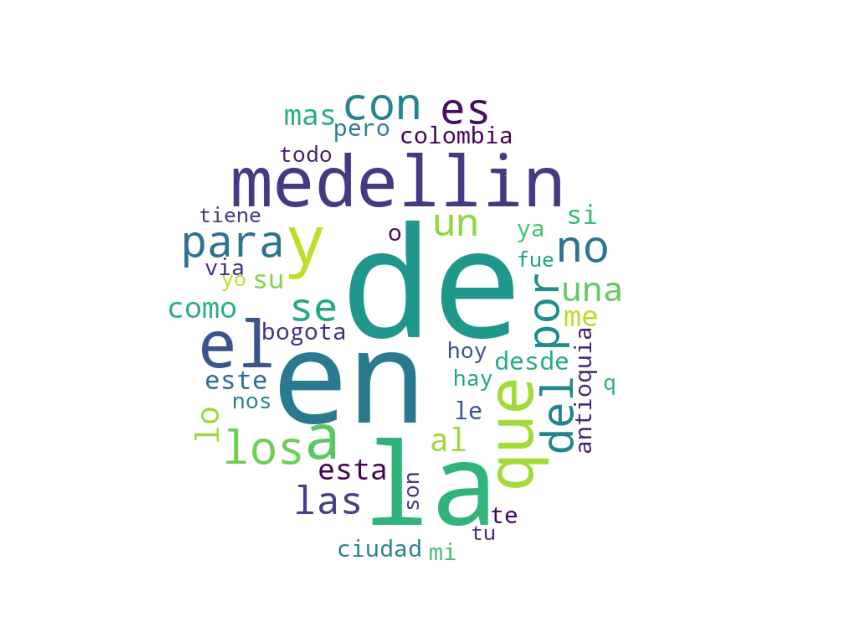

In [32]:
word_tweet_cloud=[]
for tweet in tweet_text:
    for words in tweet.split():
        word_tweet_cloud.append(words)
word_fre = FreqDist(word_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [33]:
word_fre.most_common(30)  # Get 30 most common words

[('de', 20110),
 ('en', 13842),
 ('la', 10699),
 ('medellin', 9942),
 ('y', 8904),
 ('el', 8501),
 ('que', 8246),
 ('a', 7619),
 ('los', 3783),
 ('no', 3490),
 ('con', 3433),
 ('por', 3370),
 ('del', 3368),
 ('para', 3234),
 ('es', 3163),
 ('se', 2969),
 ('un', 2684),
 ('las', 2519),
 ('una', 2019),
 ('lo', 1759),
 ('al', 1714),
 ('como', 1453),
 ('mas', 1426),
 ('esta', 1399),
 ('me', 1378),
 ('su', 1180),
 ('si', 1148),
 ('este', 1048),
 ('desde', 997),
 ('le', 916)]

As the most repeated words are words that do not represent anything relevant to our analysis, they will be included in the stop words and we will filter them so that they are not included in the word cloud and thus arrive at a more meaningful result.
This process will be carried out until we eliminate all the stop words and the word cloud shows us something more significant.

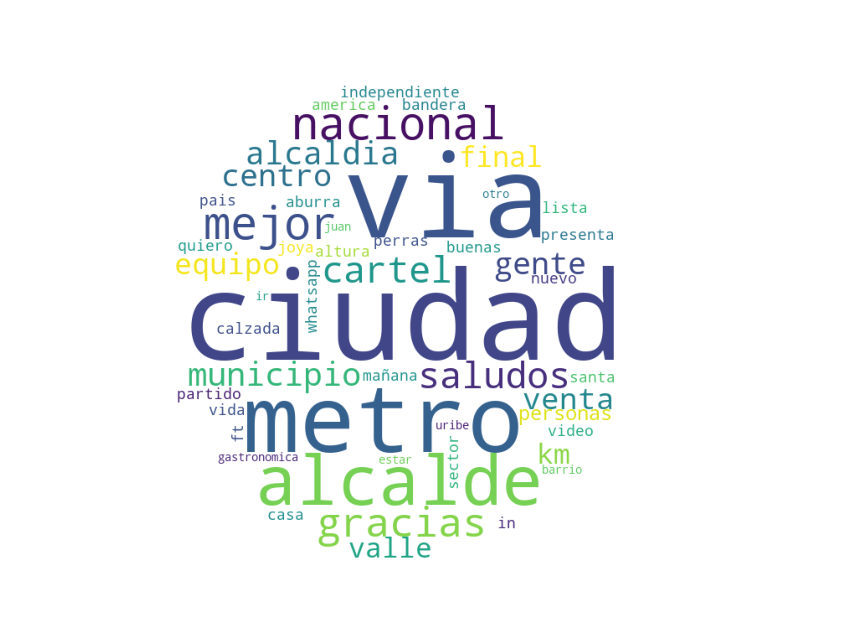

In [35]:
word_tweet_nonstop_cloud=[]
for tweet in tweet_text_nonstop:
    for words in tweet.split():
        word_tweet_nonstop_cloud.append(words)
word_fre = FreqDist(word_tweet_nonstop_cloud)
plot_word_cloud(char_mask, word_fre)

In [36]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df = pd.DataFrame.from_dict(dict_to_df)
df[df['frequency'] > 50]

,word,frequency
6,nadie,92
10,calles,75
16,casa,180
18,nuestras,79
21,contamos,66
...,...,...
9414,diputado,60
10054,conocelo,68
10940,joya,170
11846,perras,169
